In [2]:
from pathlib import Path
import pandas as pd
from singlefactorstats import SingleFactorDataHandler, Filter, SingleFactorStats

연도별, ratio별 10분위 수익률 <br>
해당 기간 포함 여부 체크

지금 상태로는 너무 은닉되어 있어 어느 랭크 그룹, 어느 회사의 수익률인지 알아내기 힘들다

## Data Load

In [3]:
data_dir_path = Path(r"./input")
ts_daily_returns = pd.read_csv(data_dir_path / "ts_daily_returns.csv", index_col="Date")
ts_capsize = pd.read_csv(data_dir_path / "ts_capsize.csv", index_col="Date")
ts_per = pd.read_csv(data_dir_path / "PER(FY0).csv", index_col="Date")
ts_pbr = pd.read_csv(data_dir_path / "PBR(FY0).csv", index_col="Date")

* q 조정 가능하게 v
* 수익률 구하는 공식 체크 v
* plotly v
* rank별 factor 값 중간값 v
* 매년 수익률 추이 v
* 벤치마크 수익률 같이 표기
* PER, PBR이 높은데 수익률이 높다? v
* 제외 로직 e.g. 당기순이익 < 0 v
* 시총 기준 1000등 이상?
* 매년 전체 기간 한번에 출력 v
* plot range v
* Class화 v
* 전체 기간 CAGR
* ROE 공식 탐구
* 10분위 수익률 플랏에 벤치마크 수익률 선 긋기
* streamlit
* data db화
* 전체 기간 연간 리밸런싱 누적 수익률, 연율화 수익률, maximum drawdown, avg. drawdown, Sharpe ratio
* 분기별 리밸런싱
* ROE, ROA, POR, GP/A, EV/EBIT, EV/EBITDA, Momentum
* 시총가중 10분위
* sector
* comments
* github

* PBR - returns scatter plot
* capsize - returns scatter plot

In [26]:
container = list()
TARGET_YEARS = [year for year in range(2000, 2012 + 1)]
for TARGET_YEAR in TARGET_YEARS:
    dataloader = SingleFactorDataHandler(ts_daily_returns, ts_per, TARGET_YEAR)
    ts_rets, per = dataloader()
    per = Filter.get_profitables(per)
    per_stats = SingleFactorStats(ts_rets, per, "PER")
    container.append(per_stats.get_prtf_returns())
    per_stats.show_quantile_groups_returns()
    per_stats.show_quantile_groups_stats()

In [27]:
group_returns = pd.DataFrame(container)
group_returns

0         1         2         3         4         5         6  \
0  -0.114232 -0.016345 -0.049212 -0.039463 -0.168236 -0.055409 -0.223579   
1   0.635547  1.078762  0.806673  0.583359  0.638274  0.352154  0.330511   
2  -0.348604 -0.334713 -0.389515 -0.397142 -0.409172 -0.470338 -0.491504   
3   0.286518  0.368764  0.292510  0.349883  0.274870  0.316298  0.192323   
4   0.793472  0.667883  0.602628  0.474477  0.456810  0.314145  0.330875   
5   0.588144  0.675895  0.658624  0.607227  0.655749  0.680332  0.669850   
6   0.356371  0.209079  0.222605  0.167406  0.139195  0.159029  0.147246   
7   0.250084  0.429034  0.154941  0.200637  0.339597  0.122551  0.193607   
8  -0.241741 -0.226966 -0.172546 -0.150640 -0.135625 -0.123322 -0.192201   
9   0.529428  0.665212  0.592613  0.531762  0.401227  0.492964  0.412431   
10  0.251020  0.154506  0.127072  0.148891  0.143198  0.096435  0.100645   
11  0.154888  0.130996  0.188703  0.140680  0.075678  0.172164  0.126112   
12  0.161010  0.233113  0.209044  0.183996  0.155830  0.116965  0.176055   

           7         8         9  
0  -0.305702 -0.461071 -0.548079  
1   0.315271  0.033598  0.103760  
2  -0.529057 -0.574779 -0.569095  
3   0.333427  0.317534  0.348016  
4   0.397728  0.373752  0.236232  
5   0.667543  1.004324  0.842458  
6   0.136784  0.106892  0.093413  
7   0.210021  0.152265  0.153396  
8  -0.168414 -0.226978 -0.255872  
9   0.483190  0.545372  0.552549  
10  0.157717  0.101329  0.010335  
11  0.126027  0.157470  0.180441  
12  0.125041  0.129258  0.017079

In [28]:
results = (group_returns + 1).cumprod()
results

0          1          2         3         4         5         6  \
0    0.885768   0.983655   0.950788  0.960537  0.831764  0.944591  0.776421   
1    1.448715   2.044784   1.717763  1.520874  1.362658  1.277232  1.033037   
2    0.943687   1.360367   1.048669  0.916870  0.805097  0.676501  0.525296   
3    1.214071   1.862022   1.355415  1.237668  1.026394  0.890476  0.626322   
4    2.177402   3.105634   2.172225  1.824913  1.495261  1.170215  0.833556   
5    3.458027   5.204718   3.602905  2.933051  2.475778  1.966350  1.391914   
6    4.690367   6.292917   4.404930  3.424062  2.820393  2.279056  1.596868   
7    5.863352   8.992795   5.087433  4.111056  3.778189  2.558358  1.906033   
8    4.445938   6.951736   4.209618  3.491768  3.265772  2.242855  1.539692   
9    6.799744  11.576113   6.704292  5.348556  4.576087  3.348501  2.174709   
10   8.506615  13.364698   7.556222  6.144911  5.231372  3.671414  2.393582   
11   9.824187  15.115425   8.982104  7.009375  5.627270  4.303501  2.695440   
12  11.405980  18.639029  10.859760  8.299074  6.504165  4.806858  3.169987   

           7         8         9  
0   0.694298  0.538929  0.451921  
1   0.913190  0.557036  0.498813  
2   0.430060  0.236864  0.214941  
3   0.573454  0.312076  0.289744  
4   0.801532  0.428715  0.358191  
5   1.336589  0.859283  0.659951  
6   1.519413  0.951133  0.721599  
7   1.838521  1.095958  0.832289  
8   1.528888  0.847200  0.619329  
9   2.267631  1.309239  0.961539  
10  2.625276  1.441903  0.971476  
11  2.956132  1.668959  1.146771  
12  3.325770  1.884685  1.166356

In [29]:
bars = results.iloc[-1] ** (1 / len(results))

In [32]:
bars = bars - 1

<AxesSubplot:>

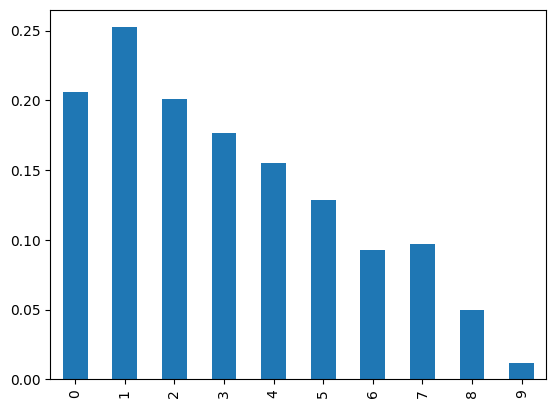

In [33]:
bars.plot.bar()

In [34]:
container = list()
TARGET_YEARS = [year for year in range(2000, 2012 + 1)]
for TARGET_YEAR in TARGET_YEARS:
    dataloader = SingleFactorDataHandler(ts_daily_returns, ts_pbr, TARGET_YEAR)
    ts_rets, pbr = dataloader()
    pbr = Filter.get_profitables(pbr)
    pbr_stats = SingleFactorStats(ts_rets, pbr, "PBR")
    container.append(pbr_stats.get_prtf_returns())
    pbr_stats.show_quantile_groups_returns()
    pbr_stats.show_quantile_groups_stats()

In [35]:
group_returns = pd.DataFrame(container)
group_returns

0         1         2         3         4         5         6  \
0  -0.014034 -0.039193 -0.042252 -0.091250 -0.170973 -0.118345 -0.215369   
1   0.929961  0.868764  0.772394  0.712126  0.424850  0.432650  0.187063   
2  -0.341587 -0.320357 -0.370369 -0.473725 -0.474599 -0.485547 -0.496714   
3   0.344899  0.339668  0.306509  0.351209  0.223400  0.279341  0.183371   
4   0.701686  0.626923  0.581595  0.489777  0.579494  0.475906  0.317164   
5   0.948718  1.079231  1.002379  0.859835  1.120536  0.805715  0.751718   
6   0.392081  0.424398  0.271696  0.205634  0.198225  0.183478  0.078237   
7   0.268576  0.293190  0.396592  0.144343  0.153578  0.031073  0.041199   
8  -0.287708 -0.180131 -0.292238 -0.215059 -0.182635 -0.196680 -0.216471   
9   0.408165  0.665419  0.674505  0.687441  0.461887  0.567006  0.436190   
10  0.083946  0.149701  0.129034  0.234393  0.166941  0.119269  0.093284   
11  0.107577  0.209492  0.168394  0.243943  0.147510  0.072978  0.008058   
12  0.038012  0.206646  0.205087  0.142423  0.154780  0.083776 -0.001271   

           7         8         9  
0  -0.239771 -0.465195 -0.598949  
1   0.237383  0.103700  0.131778  
2  -0.509021 -0.566590 -0.626771  
3   0.330289  0.143118  0.164475  
4   0.427653  0.167097  0.111742  
5   0.713726  0.451284  0.347164  
6   0.008756 -0.051798 -0.115689  
7   0.007565  0.184831 -0.099384  
8  -0.229557 -0.295555 -0.343739  
9   0.375217  0.419809  0.304880  
10  0.039670  0.014215 -0.031688  
11  0.083356  0.064276 -0.014775  
12  0.055287  0.059735 -0.094986

In [36]:
result = (group_returns + 1).cumprod()
result

0          1          2         3         4         5         6  \
0    0.985966   0.960807   0.957748  0.908750  0.829027  0.881655  0.784631   
1    1.902877   1.795522   1.697506  1.555894  1.181239  1.263103  0.931406   
2    1.252878   1.220314   1.068802  0.818827  0.620625  0.649808  0.468764   
3    1.684995   1.634816   1.396399  1.106407  0.759272  0.831326  0.554722   
4    2.867333   2.659719   2.208537  1.648300  1.199266  1.226958  0.730660   
5    5.587625   5.530172   4.422329  3.065564  2.543086  2.215537  1.279909   
6    7.778425   7.877167   5.623858  3.695947  3.047188  2.622040  1.380045   
7    9.867521  10.186671   7.854232  4.229433  3.515167  2.703515  1.436902   
8    7.028555   8.351731   5.558926  3.319857  2.873174  2.171787  1.125854   
9    9.897365  13.909134   9.308450  5.602064  4.200257  3.403203  1.616940   
10  10.728208  15.991346  10.509560  6.915151  4.901454  3.809098  1.767774   
11  11.882317  19.341402  12.279304  8.602051  5.624468  4.087078  1.782018   
12  12.333987  23.338220  14.797628  9.827178  6.495021  4.429478  1.779754   

           7         8         9  
0   0.760229  0.534805  0.401051  
1   0.940694  0.590265  0.453901  
2   0.461861  0.255827  0.169409  
3   0.614409  0.292440  0.197273  
4   0.877163  0.341306  0.219316  
5   1.503217  0.495332  0.295455  
6   1.516380  0.469674  0.261274  
7   1.527851  0.556485  0.235308  
8   1.177122  0.392013  0.154423  
9   1.618798  0.556583  0.201504  
10  1.683015  0.564495  0.195118  
11  1.823305  0.600779  0.192235  
12  1.924109  0.636666  0.173976

In [38]:
bars = result ** (1 / len(result))
bars

0         1         2         3         4         5         6  \
0   0.998913  0.996929  0.996685  0.992667  0.985680  0.990358  0.981516   
1   1.050735  1.046052  1.041544  1.034589  1.012895  1.018129  0.994549   
2   1.017493  1.015434  1.005131  0.984742  0.963971  0.967384  0.943385   
3   1.040952  1.038534  1.026017  1.007809  0.979039  0.985890  0.955682   
4   1.084403  1.078151  1.062844  1.039190  1.014076  1.015858  0.976150   
5   1.141508  1.140601  1.121154  1.089993  1.074439  1.063103  1.019165   
6   1.170928  1.172065  1.142076  1.105786  1.089489  1.076969  1.025088   
7   1.192553  1.195476  1.171802  1.117315  1.101529  1.079507  1.028276   
8   1.161833  1.177351  1.141056  1.096696  1.084573  1.061473  1.009160   
9   1.192830  1.224464  1.187214  1.141735  1.116720  1.098789  1.037656   
10  1.200249  1.237675  1.198349  1.160380  1.130061  1.108354  1.044799   
11  1.209720  1.255916  1.212782  1.180028  1.142085  1.114376  1.045444   
12  1.213196  1.274195  1.230311  1.192177  1.154798  1.121294  1.045342   

           7         8         9  
0   0.979133  0.952998  0.932131  
1   0.995308  0.960259  0.941049  
2   0.942309  0.900445  0.872343  
3   0.963224  0.909758  0.882621  
4   0.989969  0.920636  0.889843  
5   1.031851  0.947394  0.910476  
6   1.032543  0.943525  0.901906  
7   1.033142  0.955915  0.894673  
8   1.012623  0.930498  0.866150  
9   1.037748  0.955928  0.884063  
10  1.040858  0.956967  0.881876  
11  1.047288  0.961564  0.880867  
12  1.051632  0.965865  0.874130

In [39]:
bars = bars - 1
bars

0         1         2         3         4         5         6  \
0  -0.001087 -0.003071 -0.003315 -0.007333 -0.014320 -0.009642 -0.018484   
1   0.050735  0.046052  0.041544  0.034589  0.012895  0.018129 -0.005451   
2   0.017493  0.015434  0.005131 -0.015258 -0.036029 -0.032616 -0.056615   
3   0.040952  0.038534  0.026017  0.007809 -0.020961 -0.014110 -0.044318   
4   0.084403  0.078151  0.062844  0.039190  0.014076  0.015858 -0.023850   
5   0.141508  0.140601  0.121154  0.089993  0.074439  0.063103  0.019165   
6   0.170928  0.172065  0.142076  0.105786  0.089489  0.076969  0.025088   
7   0.192553  0.195476  0.171802  0.117315  0.101529  0.079507  0.028276   
8   0.161833  0.177351  0.141056  0.096696  0.084573  0.061473  0.009160   
9   0.192830  0.224464  0.187214  0.141735  0.116720  0.098789  0.037656   
10  0.200249  0.237675  0.198349  0.160380  0.130061  0.108354  0.044799   
11  0.209720  0.255916  0.212782  0.180028  0.142085  0.114376  0.045444   
12  0.213196  0.274195  0.230311  0.192177  0.154798  0.121294  0.045342   

           7         8         9  
0  -0.020867 -0.047002 -0.067869  
1  -0.004692 -0.039741 -0.058951  
2  -0.057691 -0.099555 -0.127657  
3  -0.036776 -0.090242 -0.117379  
4  -0.010031 -0.079364 -0.110157  
5   0.031851 -0.052606 -0.089524  
6   0.032543 -0.056475 -0.098094  
7   0.033142 -0.044085 -0.105327  
8   0.012623 -0.069502 -0.133850  
9   0.037748 -0.044072 -0.115937  
10  0.040858 -0.043033 -0.118124  
11  0.047288 -0.038436 -0.119133  
12  0.051632 -0.034135 -0.125870

<AxesSubplot:>

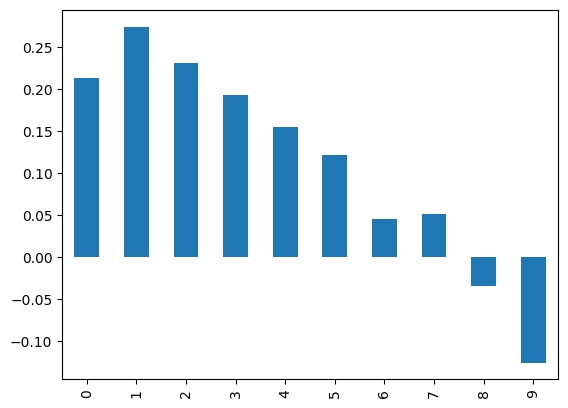

In [40]:
bars.iloc[-1].plot.bar()

In [74]:
(container[0][0] + 1) * (container[1][0] + 1) * (container[2][0] + 1)

1.8324531193723264

In [75]:
foo = pd.DataFrame({2019: container[0], 2020: container[1], 2021: container[2]})
foo = foo + 1
foo

2019      2020      2021
0  1.097614  1.443181  1.156811
1  1.072041  1.364299  1.234229
2  1.123628  1.342192  1.218699
3  1.128701  1.203575  1.265580
4  1.068091  1.259727  1.282343
5  1.105853  1.241687  1.238991
6  1.059693  1.334365  1.186237
7  0.982725  1.309115  1.139680
8  0.905135  1.272325  1.191072
9  0.851972  1.246861  1.230782

In [78]:
bar = foo.cumprod(axis='columns').iloc[:, -1]
bar

0    1.832453
1    1.805165
2    1.837949
3    1.719261
4    1.725398
5    1.701286
6    1.677360
7    1.466197
8    1.371670
9    1.307449
Name: 2021, dtype: float64

In [80]:
baz = bar ** (1/3) - 1
baz

0    0.223708
1    0.217603
2    0.224930
3    0.197974
4    0.199397
5    0.193784
6    0.188161
7    0.136050
8    0.111092
9    0.093474
Name: 2021, dtype: float64

<AxesSubplot:>

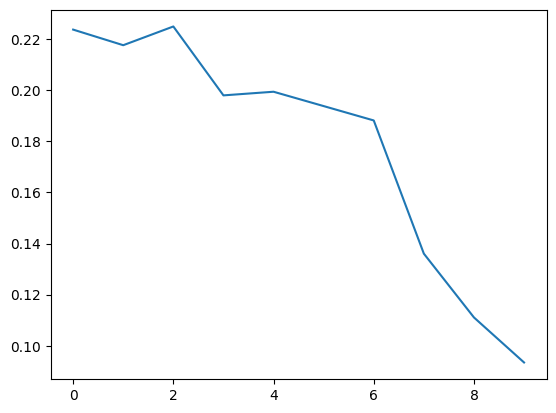

In [81]:
baz.plot()

<AxesSubplot:>

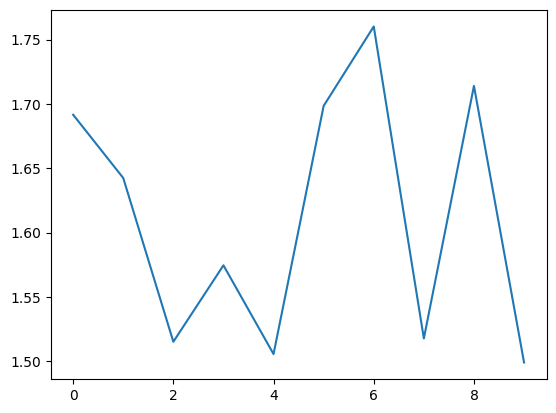

In [52]:
foo.cumprod(axis='columns').iloc[:, -1].plot()

In [24]:
pd.DataFrame({2019: container[0], 2020: container[1], 2021: container[2]}).T

0         1         2         3         4         5         6  \
2019 -0.272175 -0.235596 -0.229883 -0.230776 -0.213467 -0.164116 -0.196310   
2020  0.960823  1.105809  1.144406  1.076919  1.071632  0.989521  0.973302   
2021  0.141931  0.130527  0.145166  0.158082  0.073637  0.170744  0.080936   

             7         8         9  
2019 -0.237931 -0.172298 -0.193125  
2020  0.977776  1.038171  0.960048  
2021  0.088006  0.073140  0.073733

In [5]:
# TARGET_YEARS = [year for year in range(2000, 2021 + 1)]
# TARGET_DATES = [int (str(TARGET_YEAR)+'0401') for TARGET_YEAR in TARGET_YEARS]

# for TARGET_DATE in TARGET_DATES:
#     ts_rets = singlefactorstats.get_specific_period_daily_returns(ts_adj_close, TARGET_DATE)
#     ts_rets = singlefactorstats.get_rid_of_ret_outliers(ts_rets)
#     ts_per = singlefactorstats.get_specific_period_ts_data(per, TARGET_DATE)
#     target_tickers = singlefactorstats.get_tickers_intersection(ts_rets, ts_per)
#     ts_per = ts_per[target_tickers]
#     ts_per = singlefactorstats.get_profitables(ts_per)
#     per_groups = singlefactorstats.get_factor_groups(ts_per, TARGET_DATE)
#     ts_per_group_returns = singlefactorstats.get_same_weight_ts_prtf_returns(ts_rets, per_groups)
#     per_group_medians = singlefactorstats.get_factor_group_medians(ts_per, per_groups, TARGET_DATE)
#     # utils.show_quantile_groups_returns('PER', ts_per_group_returns, TARGET_DATE)
#     singlefactorstats.show_quantile_groups_stats('PER', ts_per_group_returns, per_group_medians, TARGET_DATE)

## Capital Size

In [7]:
TARGET_DATE = 20170401
ts_rets = utils.get_specific_period_daily_returns(ts_adj_close, TARGET_DATE)
ts_rets = utils.get_rid_of_ret_outliers(ts_rets)
ts_capsize = utils.get_specific_period_ts_data(capsize, TARGET_DATE)
target_tickers = utils.get_tickers_intersection(ts_rets, ts_capsize)
ts_capsize = ts_capsize[target_tickers]
capsize_groups = utils.get_factor_groups(ts_capsize, TARGET_DATE)
ts_capsize_group_returns = utils.get_same_weight_ts_prtf_returns(ts_rets, capsize_groups)
capsize_group_medians = utils.get_factor_group_medians(ts_capsize, capsize_groups, TARGET_DATE)

In [8]:
utils.show_quantile_groups_returns('Capsize', ts_per_group_returns, TARGET_DATE)

In [9]:
utils.show_quantile_groups_stats('Capsize', ts_capsize_group_returns, capsize_group_medians, TARGET_DATE)

In [10]:
TARGET_DATE = 20100401
ts_rets = utils.get_specific_period_daily_returns(ts_adj_close, TARGET_DATE)
ts_rets = utils.get_rid_of_ret_outliers(ts_rets)
ts_pbr = utils.get_specific_period_ts_data(pbr, TARGET_DATE)
target_tickers = utils.get_tickers_intersection(ts_rets, ts_pbr)
ts_pbr = ts_pbr[target_tickers]
pbr_groups = utils.get_factor_groups(ts_pbr, TARGET_DATE)
ts_pbr_group_returns = utils.get_same_weight_ts_prtf_returns(ts_rets, pbr_groups)
pbr_group_medians = utils.get_factor_group_medians(ts_pbr, pbr_groups, TARGET_DATE)

In [11]:
utils.show_quantile_groups_returns('PBR', ts_per_group_returns, TARGET_DATE)

In [12]:
utils.show_quantile_groups_stats('PBR', ts_pbr_group_returns, pbr_group_medians, TARGET_DATE)